
# Laboratorio 4

### Tutorial 7 Rate of Return, Mean and Variance

**Universidad Nacional de Colombia - Sede Bogotá**

 _**Metodos Numericos**_

 **Docente:**   
German Jairo Hernandez Perez

 **Estudiante:** Luis Miguel Báez Aponte - lmbaeza@unal.edu.co


**Elegir la version 3.7 de python**

In [1]:
#!/usr/bin/env python3.7

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#define a function to simulate rolling a dice
def dice():
    number=  [1,2,3,4,5,6]
    return random.choice(number)

series = np.array([dice() for x in range(10000)])
print(series)

[2 5 4 ... 4 1 5]


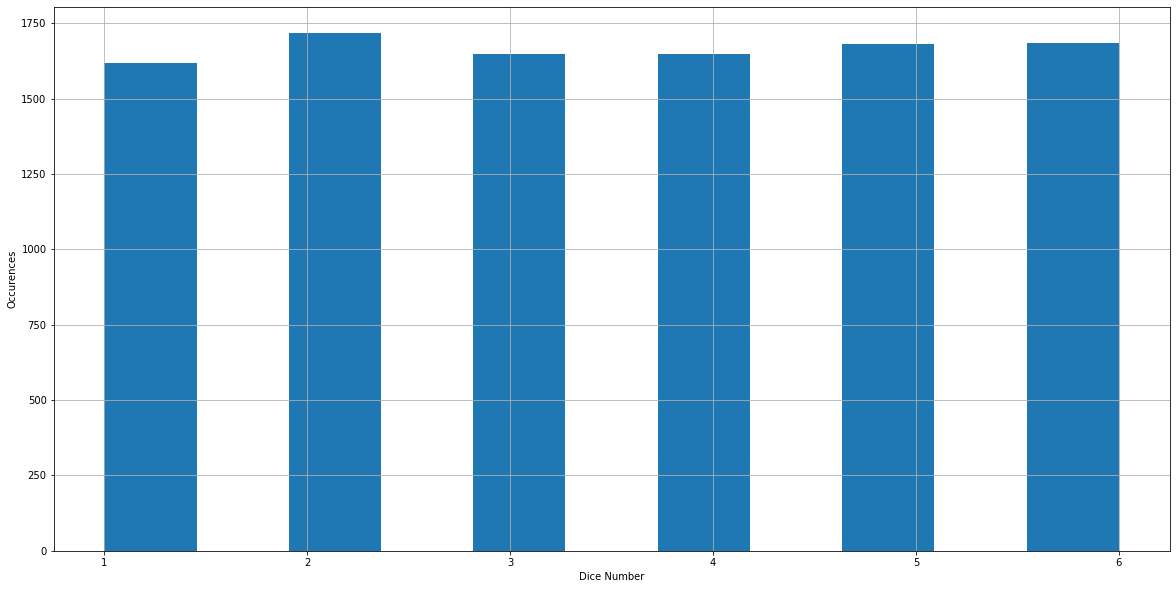

In [3]:
plt.figure(figsize = (20,10))
plt.hist(series,bins = 11,align = 'mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurences')
plt.grid()
plt.show()

In [4]:
print(len([x for x in series if x <= 3])/float(len(series)))
print(np.mean(series))

0.4986
3.5109


In [5]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a<= 7:
        return 1
    else:
        return 0

In [6]:
res = [trial() for x in range(10)]
print(sum(res))

9


In [7]:
def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
print(binomial(8))

0.2332


In [8]:
prob = []
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob,index = range(1,11))
print(prob_s)

1     0.0001
2     0.0012
3     0.0093
4     0.0358
5     0.1084
6     0.1962
7     0.2679
8     0.2312
9     0.1197
10    0.0273
dtype: float64


In [10]:
def factorial(number):
  fact = 1
  for i in range(1, number+1):
    fact *= i
  return fact

In [11]:
print((float(factorial(10))/(factorial(7)*factorial(10-7)))*(0.7**7)*(0.3**3))
print((float(factorial(10))/(factorial(8)*factorial(10-8)))*(0.7**8)*(0.3**2))

0.2668279319999998
0.23347444049999988


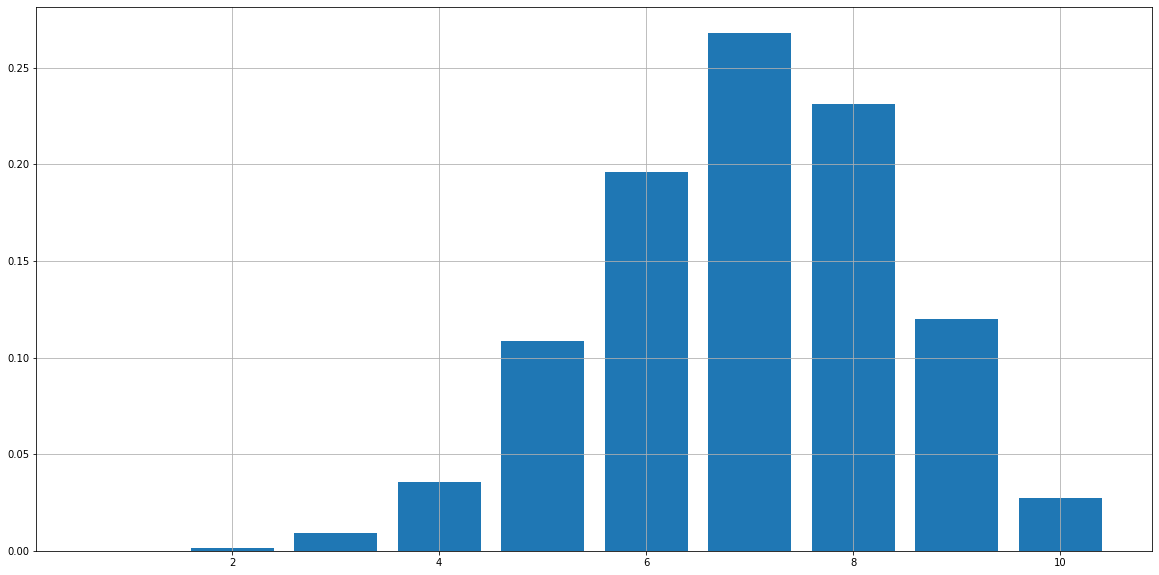

In [12]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

In [15]:
plt.figure(figsize = (20,10))
plt.show()

<Figure size 1440x720 with 0 Axes>

In [16]:
!pip install Quandl

In [18]:
import quandl
quandl.ApiConfig.api_key = 'tAyfv1zpWnyhmDsp91yv'
spy_table = quandl.get('BCIW/_SPXT')
spy = spy_table.loc['2009':'2017',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

In [19]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

In [20]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

In [21]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()